Planteamiento del problema:
  Un heladero ha comprobado que, a un precio de 50 céntimos de euro la unidad, vende una media de 200 helados diarios. Por cada céntimo que aumenta el precio, vende dos helados menos al día. Si el coste por unidad es de 40 céntimos, ¿a qué precio de venta es máximo el beneficio diario que obtiene el heladero? ¿Cuál será ese beneficio?

In [1]:
# Definimos la función que representa el beneficio obtenido f(x) donde x es el precio
"""
  Cantidad vendida = 200 - (x - 50)*2 = 200 - 2*x + 100 = 300 - 2*x
  Ingresos totales = (300 - 2*x) * x = -2*x^2 + 300*x
  Costes totales   = (300 - 2*x) * 40 = -80*x + 1200
  Beneficio total  = -2*x**2 + 300*x - 80*x + 1200 = -2*x**2 + 220*x + 1200
"""

'\n  Cantidad vendida = 200 - (x - 50)*2 = 200 - 2*x + 100 = 300 - 2*x\n  Ingresos totales = (300 - 2*x) * x = -2*x^2 + 300*x\n  Costes totales   = (300 - 2*x) * 40 = -80*x + 1200\n  Beneficio total  = -2*x**2 + 300*x - 80*x + 1200 = -2*x**2 + 220*x + 1200\n'

In [2]:
# Importamos np y plt
import numpy as np
import matplotlib.pyplot as plt

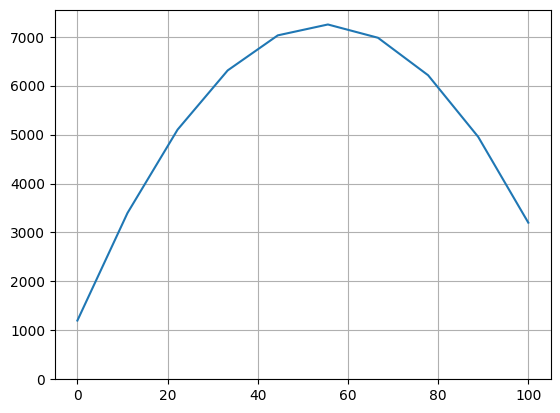

In [3]:
# Representamos gráficamente la función beneficio
x = np.linspace(0, 100, 10)
plt.plot(x, -2*x**2 + 220*x + 1200)
plt.axis(ymin=0)
plt.grid(True)
plt.show()

In [4]:
# Calcular exactamente el valor que maximiza el beneficio
# NO PODEMOS UTILIZAR pulp o cvxopt pq -2*x1**2 + 220*x1 + 1200 es una función polinómica de grado 2
from pulp import *
x1 = LpVariable("x1", 0, 100)
prob = LpProblem("helados", LpMaximize)
prob += -2*x1**2 + 220*x1 + 1200

TypeError: unsupported operand type(s) for ** or pow(): 'LpVariable' and 'int'

In [ ]:
# utilizando SciPy
from scipy.optimize import root, minimize
helado_root = root(lambda x: -2*x**2 + 220*x + 1200, 0)
print(helado_root)

 message: The solution converged.
 success: True
  status: 1
     fun: [ 0.000e+00]
       x: [-5.208e+00]
    nfev: 10
    fjac: [[-1.000e+00]]
       r: [-2.408e+02]
     qtf: [ 1.527e-09]


In [ ]:
# Minimizar una función
mymin = minimize(lambda x: -(-2*x**2 + 220*x + 1200), 0, method='BFGS')
print(mymin)
print("Beneficio optimo {0:.2f} € en precio {1:.0f} céntimos".format(-mymin.fun / 100, mymin.x[0]))

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -7249.999999999961
        x: [ 5.500e+01]
      nit: 4
      jac: [ 0.000e+00]
 hess_inv: [[ 1.667e-01]]
     nfev: 14
     njev: 7
Beneficio optimo 72.50 € en precio 55 céntimos
